# 1. Введение

На данный момент мною решается задача исправления ошибки написания -н- -нн- в причастиях и отглагольных прилагательных.

До этого спринта в несколько итераций был собран бандл слов и проведено тестовое обучение текущей модели.

На этом спринте еще раз обновил бандл слов и снова обучил модель.

## 2. Основная часть

Касаемо сборки бандла. Я взял первые 100 строк из предыдущего набора слов, и просмотрел их глазами глазами. Там, действительно, было много ложно-положительных срабатываний, которые должны отлавливаться простым словарем. Но также я нашел немало ошибок в корпусе, которые приводили к странным артефактам:

Бонус: 160 слов с тремя (!) н

['спасеннной',
 'аукционнные',
 'собственнная',
 'собственнные',
 'информационнное',
 'указаннных',
 'квалифицированнные',
 'ваннных',
 'военнные',
 'даннный',
 'аргументированнный',
 'виннный',
 'списаннный',
 'возведеннная',
 'государственнными',
 'даннным',
 'качественннее',
 'подлиннной',
 'невыясненнных',
 'установленнные',
 'построеннные',
 'созданнный',
 'военнными',
 'незарегистрированнного',
 'обещаннный',
 'многочисленнных',
 'повышеннный',
 'обменнных',
 'замеченнных',
 'военнный',
 'лицензионнный',
 'осужденнного',
 'осужденнный',
 'предъявленнных',
 'незаконнной',
 'самопровозглашеннных',
 'районнные',
 'газотурбиннных',
 'объявленнной',
 'инвестиционнном',
 'неправительственнных',
 'телекоммуникационнного',
 'уничтоженнные',
 'полноценнные',
 'магнитофоннная',
 'государственнное',
 'канцерогеннного',
 'призаннный',
 'обвиненнных',
 'задержаннного',
 'зарегистрированнных',
 'искренннее',
 'оперативно-следственнная',
 'военнной',
 'целенаправленнный',
 'предназначеннных',
 'встроеннной',
 'неизменнным',
 'вложеннными',
 'найденнных',
 'расположеннного',
 'телефоннные',
 'незаполненнный',
 'рассеяннного',
 'диверсионнной',
 'обнаруженнный',
 'могущественнными',
 'мультивселеннной',
 'скоординированнные',
 'востребованнными',
 'военнных',
 'телевизионнных',
 'высокопоставленнный',
 'предложеннный',
 'неназваннная',
 'внутреннних',
 'традиционнные',
 'казненнный',
 'лишеннными',
 'подписаннного',
 'увеличеннной',
 'оппозиционнный',
 'санкционнные',
 'военнопленнный',
 'намеченнной',
 'полученнного',
 'созданнная',
 'временнный',
 'межгосударственнной',
 'современнной',
 'государственнный',
 'пожизеннное',
 'осужденнных',
 'посвященнному',
 'обнаруженнное',
 'уволеннный',
 'заложеннные',
 'ликвидированнного',
 'временнных',
 'полуразрушеннном',
 'ценнных',
 'наложеннный',
 'стекляннной',
 'соединеннных',
 'привилегированнные',
 'обновленнного',
 'высокопоставленнного',
 'установленнных',
 'представленнном',
 'незаконнным',
 'незаконнных',
 'проведеннного',
 'военнную',
 'доменнные',
 'внутреннние',
 'объединеннной',
 'объявленнный',
 'вовлеченнные',
 'вестернизированнную',
 'легкобронированнных',
 'установленнная',
 'ценнную',
 'обнаруженнном',
 'гарантированнный',
 'подчиненнные',
 'вызваннных',
 'расположеннное',
 'коституционнный',
 'совершеннных',
 'военнная',
 'даннное',
 'телефоннный',
 'собраннные',
 'прикованнной',
 'оглашеннного',
 'отмеченнный',
 'опозиционнной',
 'коррумпированнных',
 'басманнный',
 'дислоцированнный',
 'многомиллионнной',
 'обнаженнном',
 'населеннных',
 'бутилированнная',
 'доследственнной',
 'пенсионнной',
 'опубликованнным',
 'отечественнной',
 'произведеннные',
 'отмененнной',
 'арестованнных',
 'иностраннные',
 'построннние',
 'неизменнной',
 'информационно-коммуникационнные',
 'авиационнные',
 'общественнных',
 'гарнизоннный',
 'подчиненнными',
 'нарушеннным',
 'уничтоженнной',
 'районнную',
 'обороннном']

Все это решается предварительным прогоном по словарю перед созданием списка слов, что я и сделал. Также снова поменял логику отбора слов. Раньше я сначала обрезал слово, а потом использовал обрезанную часть для нахождения пары. Сейчас я ищу пару для необрезанного слова, а только потом обрезаю. Этот подход должен работать, так как корпус большой, значит, если слово допускает оба варианта написания, то хотя бы в одном окончании этот вариант встретится. Довольно много времени я потратил, чтобы прийти к такому несложному выводу

В итоге получилось 169 слов

In [1]:
from pathlib import Path

import yo_fluq_ds as yfds


n_nn_vocab_path = Path.cwd().parent/'words.json'
n_nn_words = yfds.FileIO.read_json(n_nn_vocab_path)

print(f'n-nn vocab size: {len(n_nn_words)}')

n-nn vocab size: 169


In [2]:
n_nn_words

['канцероге',
 'варено-мороже',
 'электро',
 'сезо',
 'контуже',
 'пале',
 'джи',
 'перего',
 'име',
 'паути',
 'пута',
 'магази',
 'це',
 'ми',
 'овчи',
 'маши',
 'рубле',
 'купо',
 'ге',
 'переме',
 'крепле',
 'сея',
 'бараба',
 'покло',
 'кова',
 'окраи',
 'креще',
 'лагу',
 'накло',
 'рути',
 '48-миллио',
 'чемода',
 'лимо',
 'ками',
 'лу',
 'коро',
 'колото-реза',
 'жже',
 'плавле',
 'рестора',
 'зако',
 'миллио',
 '130-миллио',
 'тка',
 'стру',
 'плете',
 'витами',
 'тума',
 'райо',
 'золоче',
 'пиле',
 '200-миллио',
 'кипяче',
 'прида',
 'лави',
 'зо',
 'спи',
 'сте',
 'карти',
 'зеле',
 'мороже',
 'полови',
 'охра',
 'сало',
 'сме',
 'неписа',
 'пупови',
 'краде',
 'фонта',
 'ра',
 'тисне',
 'асфальтобето',
 'турби',
 'стра',
 'батальо',
 'укло',
 'карто',
 'стриже',
 'патро',
 'реза',
 'кваше',
 'стреля',
 'краше',
 'дивизио',
 'карма',
 'общи',
 'телефо',
 'гарнизо',
 'обме',
 'ви',
 'урага',
 'ваго',
 'коло',
 'экра',
 'адро',
 'жарго',
 'зва',
 'фото',
 'ране',
 'орга',
 'и

Далее обучил модель. Собрал датасет из 200к строк. Полный собрать не смог, потому что во время сборки у меня съедается вся оперативная память.

Пробовал обучать при размерах батча 20к и 10к, в первом случае на промежутке в 15 эпох обучение шло заметно лучше. По итогу взял размер батча в 20к и обучил в 50 эпох. Вот что получилось:

In [17]:
import matplotlib.pyplot as plt
import json


plt.rcParams['figure.figsize'] = (7, 8)

In [8]:
with open('training.json') as f:
    data = json.load(f)

In [27]:
print(f'test: {data[-1]["roc_auc_score_test"]}, display: {data[-1]["roc_auc_score_display"]}')

test: 0.8949991683591567, display: 0.9051566619312583


Не стал перебирать другие параметры обучения, потому что те, что стоят сейчас, выглядят адекватно, а как показывает опыт с тся-ться, при любых адекватных значениях сеть должна сходиться

По тому, что получилось, можно сказать, что сеть обучается заметно медленнее (в плане увеличения метрики), чем вслучае с тся-ться, где хватало всего 15 эпох.

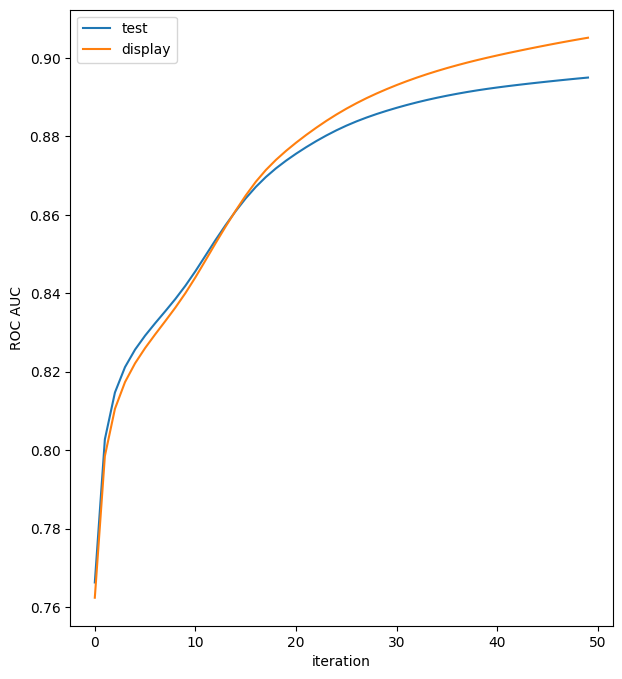

In [28]:
test_data = [iteration['roc_auc_score_test'] for iteration in data]
display_data = [iteration['roc_auc_score_display'] for iteration in data]

_, axe = plt.subplots(1, 1)
axe.set_xlabel('iteration')
axe.set_ylabel('ROC AUC')
axe.plot(test_data, label='test')
axe.plot(display_data, label='display')
_ = axe.legend()

# 3. Что теперь?

Можно пропробовать обучить сеть на полном датасете, или с использованием нового алгоритма, или все сразу. Если полученный мною сейчас результат окажется отражающим реальность и без каких-либо серъезных ошибок, то, я думаю, что на этом можно закончить работу в этом направлении, т.к. виден некоторый успех, хотя еще есть вещи, на которые можно обратить внимание, например скорость сходимости.